In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import import_ipynb
from encode import *

importing Jupyter notebook from encode.ipynb


In [2]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

df = pd.read_excel("transformed6.xlsx")

In [3]:
df = df.fillna(df.mean())


df1 = df.fillna(method='ffill')
df1 = df1.drop(['Unnamed: 0'], axis=1)

In [4]:
#df1 = encode(df1)


ysplit = df1['Vehicle Type']
xsplit = df1.drop(['Vehicle Type'],axis=1)
dt = xsplit.select_dtypes(include=['datetime64'])
cat2 = list(dt.columns)
categorical = xsplit.select_dtypes(exclude=['float64'])
cat3 = list(categorical.columns)
cols = cat2 + cat3
le = preprocessing.LabelEncoder()
#xsplit = xsplit.apply(le.fit_transform)
xsplit[cols] = xsplit[cols].apply(lambda col: le.fit_transform(col))

In [5]:
#xsplit = pd.get_dummies(xsplit, columns=cols)
x1split = xsplit

In [6]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x1split,ysplit)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1split.columns)
fes = pd.concat([dfcolumns,dfscores],axis=1)
fes.columns = ['Specs','Score']
fes.nlargest(15,'Score')
fes = fes.sort_values(by =['Score'],ascending=False)
large = fes.head(5)

In [8]:
corr = large['Specs'].values
xsplit = x1split[corr]        

In [9]:
xtrain, xtest = train_test_split(xsplit, test_size=0.2, shuffle=False)
ytrain, ytest = train_test_split(ysplit, test_size=0.2, shuffle=False)

gnb = gnb.fit(xtrain,ytrain)
mnb = mnb.fit(xtrain,ytrain)
bnb = bnb.fit(xtrain,ytrain)
bpred = bnb.fit(xtrain,ytrain)
gpred = gnb.predict(xtest)
mpred = mnb.predict(xtest)
bpred = bnb.predict(xtest)

In [10]:
accuracy_score(ytest,gpred)

0.7195

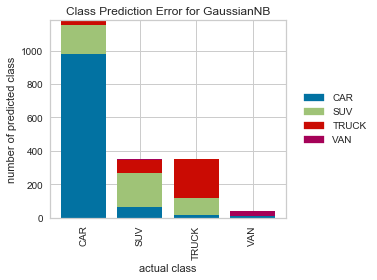

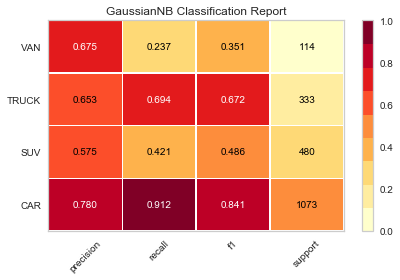

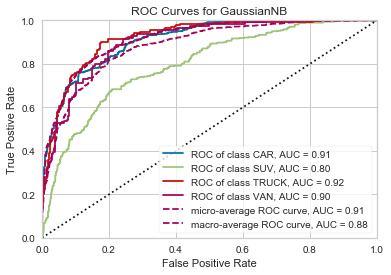

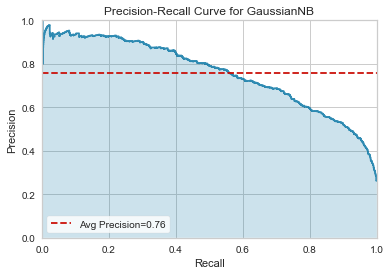

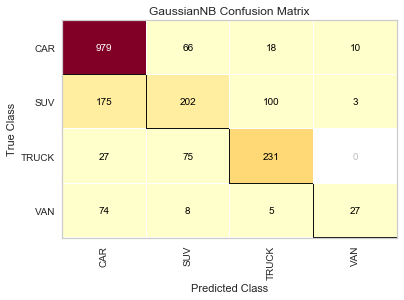

In [14]:
from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ROCAUC, PrecisionRecallCurve, ConfusionMatrix
model = GaussianNB()
viz = ClassPredictionError(model)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()

classes = ["CAR", "SUV", "TRUCK", "VAN"]
viz = ClassificationReport(model, classes=classes, support=True)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
classes = ["CAR", "SUV", "TRUCK", "VAN"]
viz = ROCAUC(model, classes=classes)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
viz = PrecisionRecallCurve(model)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()
 
classes = ["CAR", "SUV", "TRUCK", "VAN"]
viz = ConfusionMatrix(model,classes=classes,label_encoder={0: 'CAR', 1: 'SUV', 2: 'TRUCK', 3: 'VAN'})
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()